In [1]:
import importlib
import sys
from pathlib import Path
import pandas as pd
# Ajouter le chemin vers src au PYTHONPATH
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

from src.data_loader import load_clean_recipes, load_clean_interactions, load_clean_merged

from src.data_visualization import (rating_distribution,
    recipe_mean_rating_distribution,
    top_users_by_activity,
    user_mean_rating_distribution,
    user_count_vs_mean_rating,
    activity_bucket_bar,
    analyze_contributors,
    statistique_descriptive,
    plot_prep_time_distribution,
    plot_ingredient,
    plot_n_steps_distribution,
    analyse_tags,
    plot_tags_distribution,
    plot_nutrition_distribution,
    analyze_ingredients_vectorized,
    minutes_group_negative_reviews_bar,
    
    ##generate_all_interaction_univariates,
)

#Chargement des données nettoyées
recipes_df = load_clean_recipes()
interactions_df= load_clean_interactions()
merged_df = load_clean_merged()


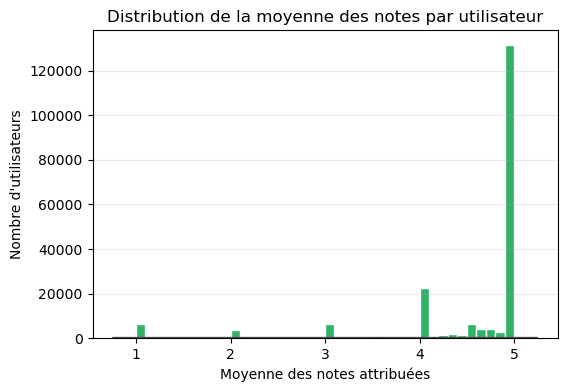

In [3]:
user_mean_rating_distribution(interactions_df, show=True)

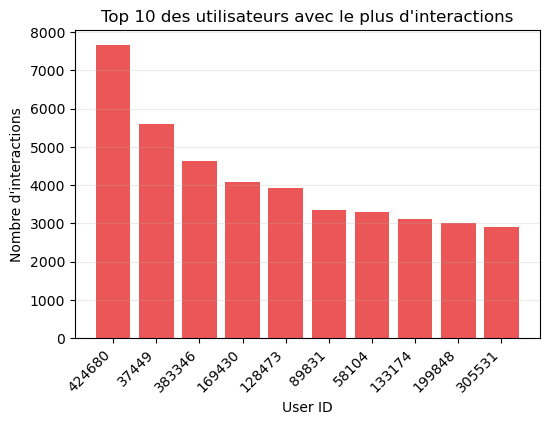

In [4]:
top_users_by_activity(interactions_df, show=True)

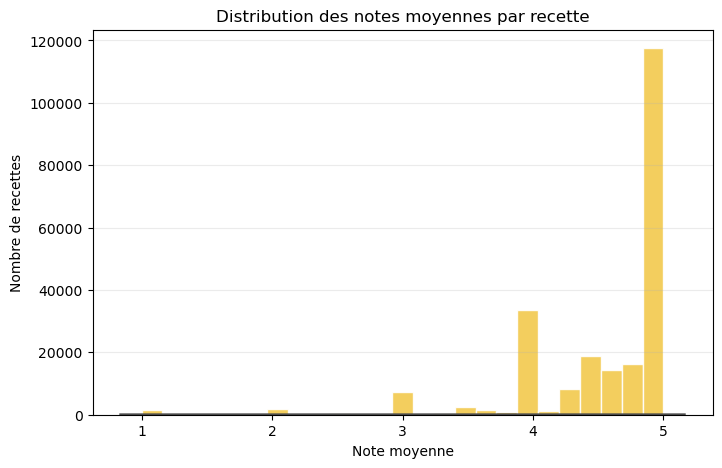

In [5]:
recipe_mean_rating_distribution(interactions_df, show=True)

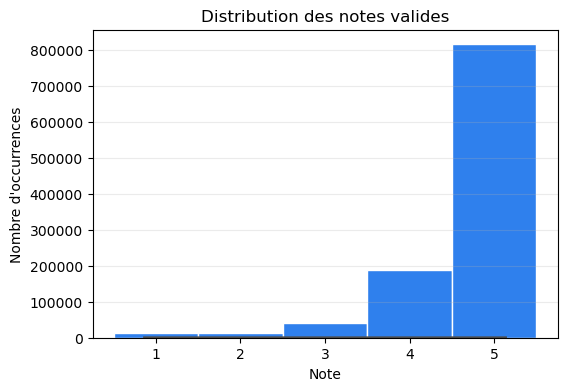

In [6]:
rating_distribution(interactions_df,show=True)


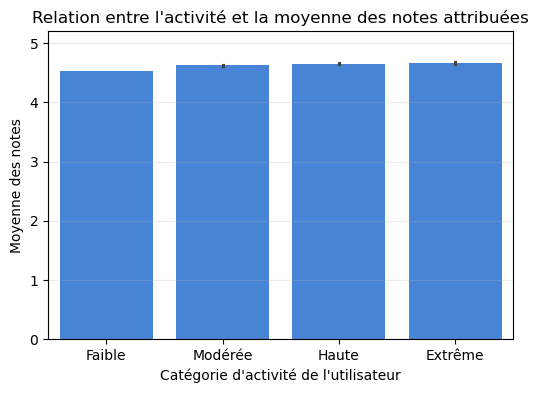

In [7]:
activity_bucket_bar(interactions_df, show=True)

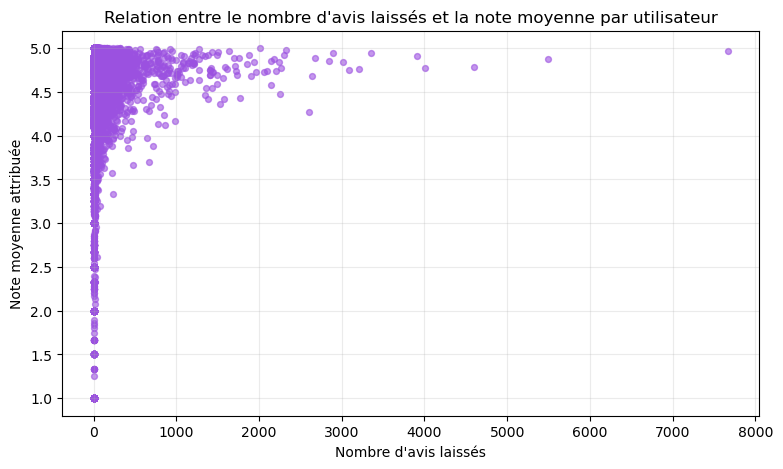

In [8]:
user_count_vs_mean_rating(interactions_df, show=True)

In [9]:
interactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   user_id           1132367 non-null  int64  
 1   recipe_id         1132367 non-null  int64  
 2   date              1132367 non-null  object 
 3   rating            1071520 non-null  float64
 4   review            1132367 non-null  object 
 5   binary_sentiment  1132367 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 51.8+ MB


In [10]:
##conversions des types de données
interactions_df['date']=pd.to_datetime(interactions_df['date'])
interactions_df['user_id']=interactions_df['user_id'].astype('category')

### **Analyse Univariée RECIPES**

Dans cette partie nous nous intéressons à l'étude univariée de la table *recipes*. Nous allons chercher à déterminer la tendance globale des différentes variables de façon isolée

**Analyse sur les contributeurs**

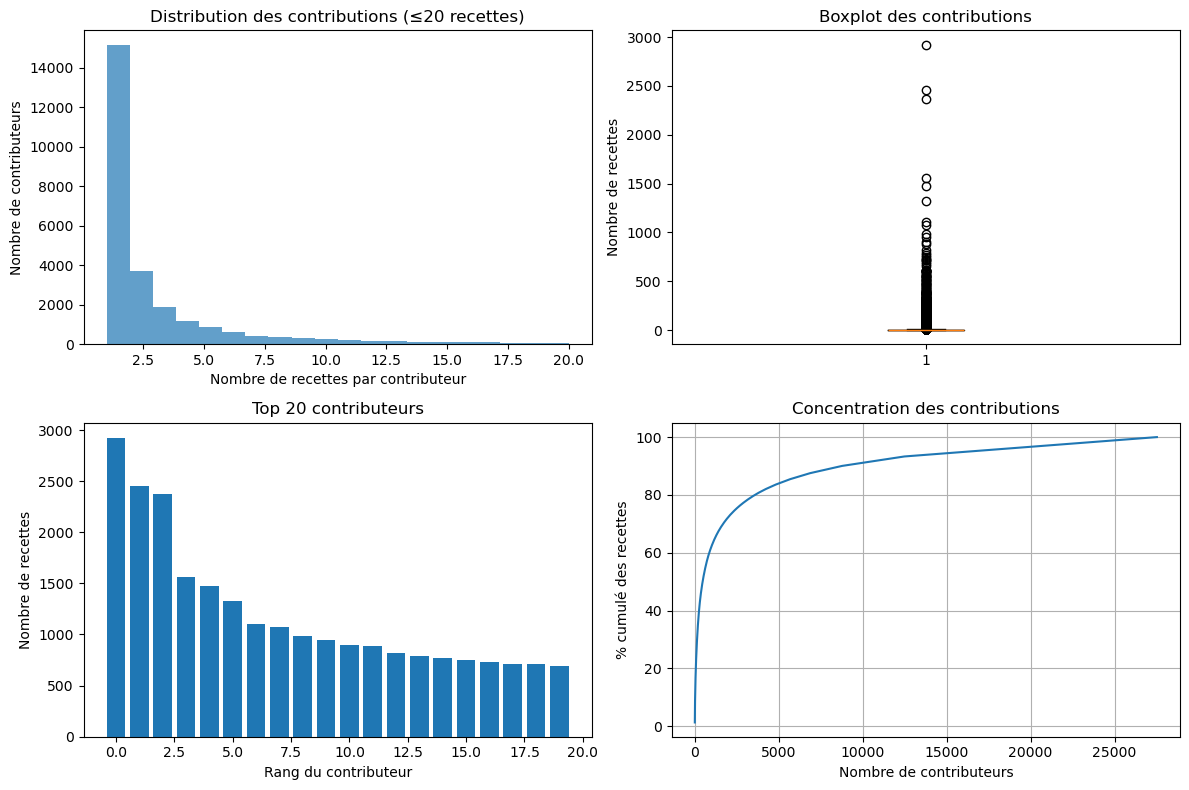

In [11]:
# analyse des contributeurs des recettes
analyze_contributors(recipes_df)

**Analyse sur les minutes**

In [13]:
statistique_descriptive(recipes_df, column='minutes')

,Valeur
Moyenne,91.243310
Médiane,40.000000
Écart-type,566.775875
Variance,321234.892258
Minimum,0.000000
Maximum,43200.000000
quantile_025,20.000000
quantile_075,65.000000
skewness,41.035905
kurtosis,2218.334903


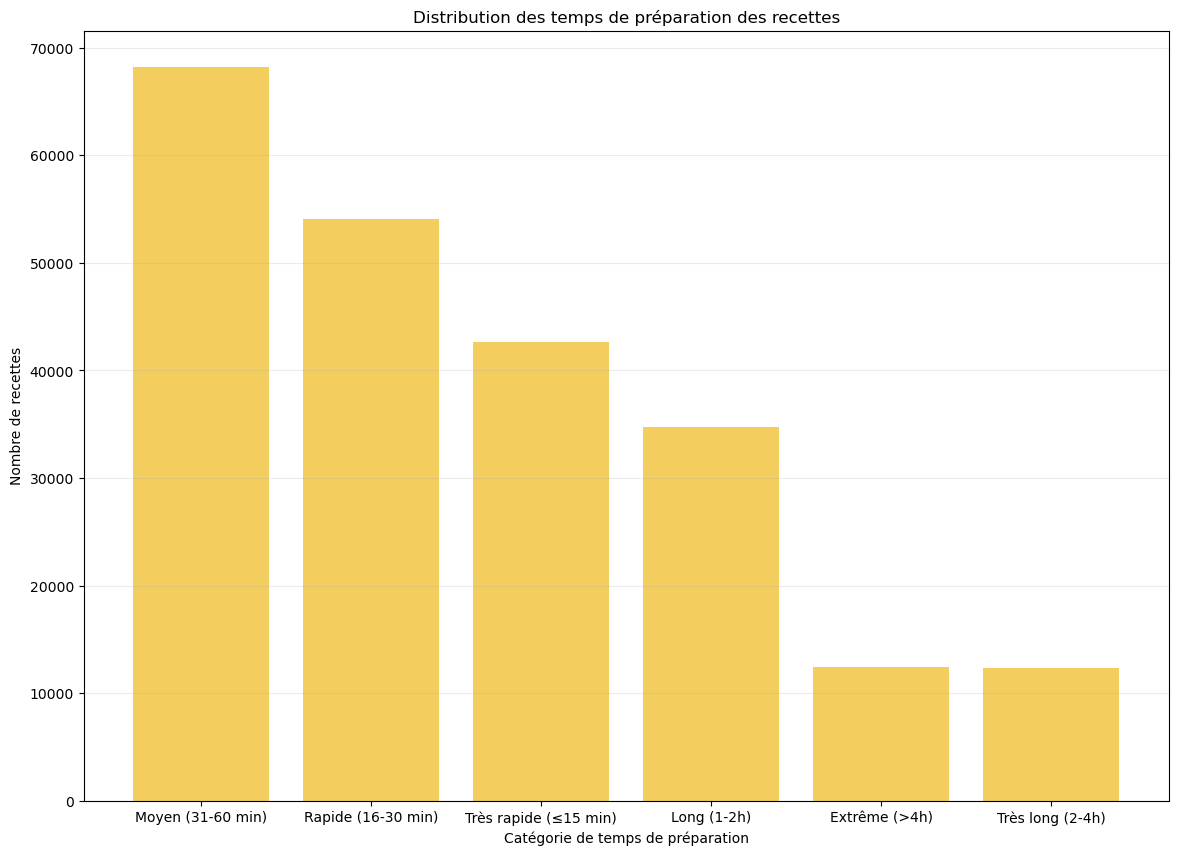

In [14]:
plot_prep_time_distribution(recipes_df, show=True)

**analyse sur les ingrédients**

In [3]:
analyze_ingredients_vectorized(recipes_df)

,Valeur
Nb_uniques_ingredients,14823
Nb_total_ingredients,2035231
Nb_ingredients_les_plus_utilises,"[(salt, 82856), (butter, 52497), (sugar, 40989)]"
Moyenne,9.064486
Médiane,9.0
Écart-type,3.73149
Minimum,1
Maximum,43


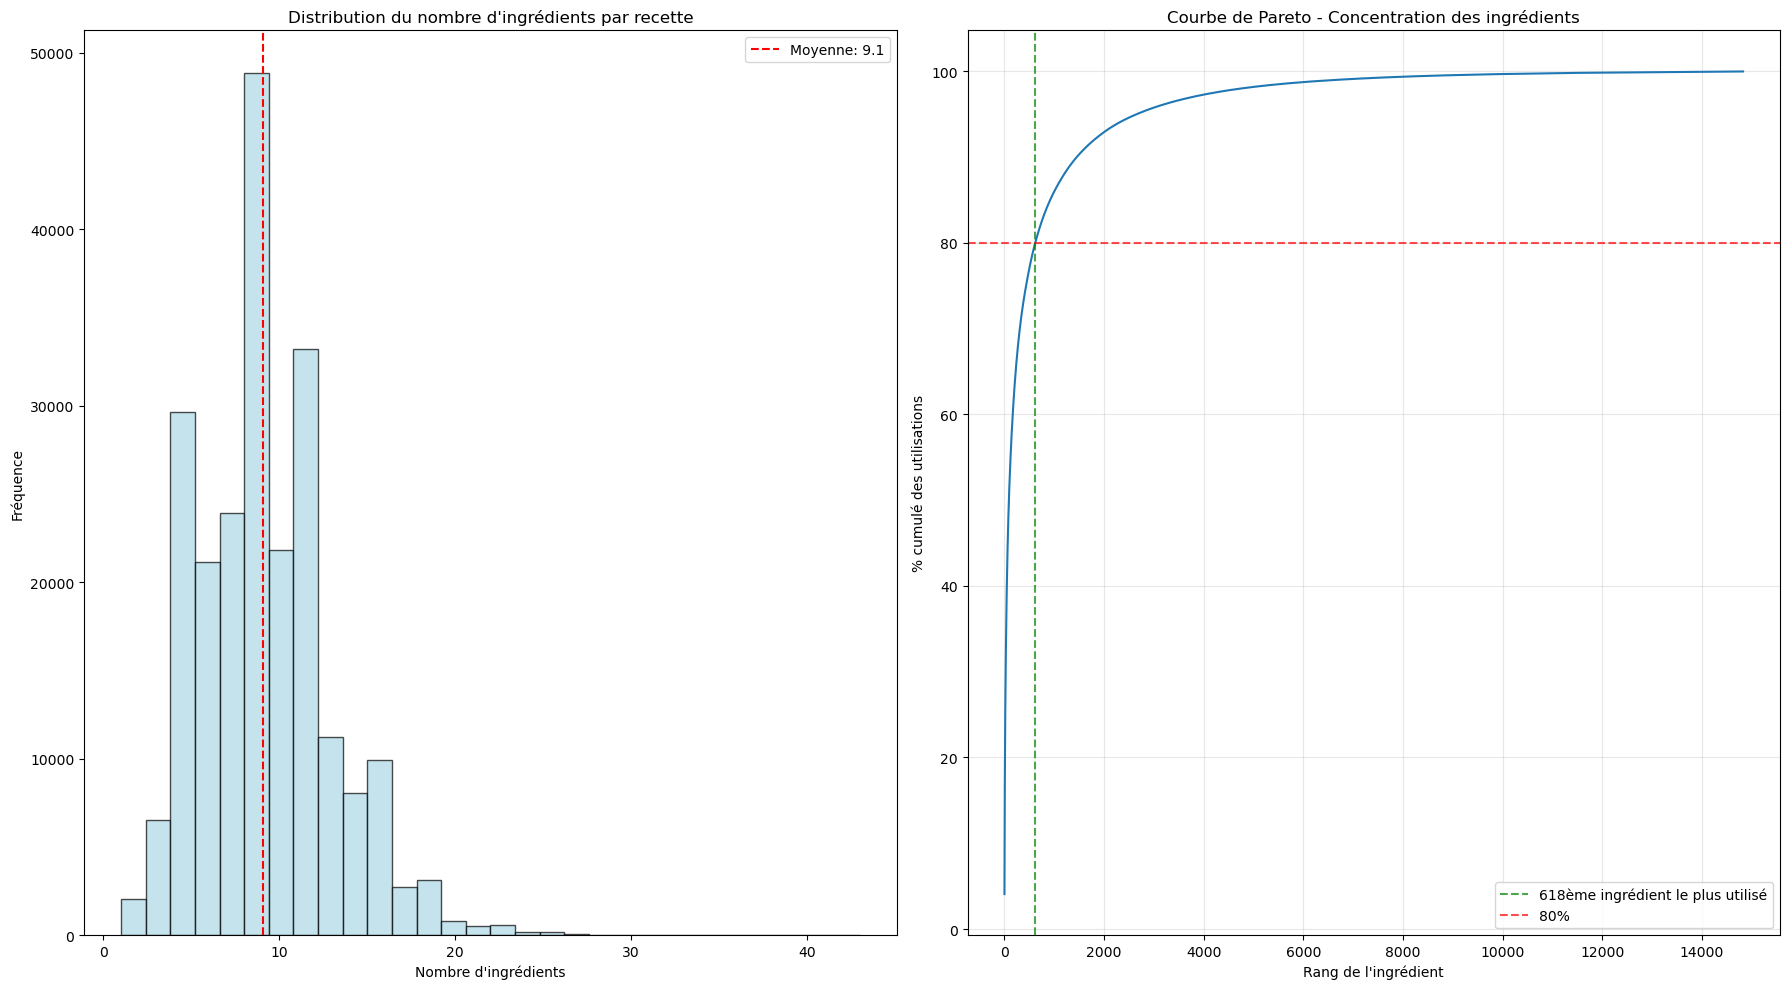

In [2]:
#visualisation distribution des ingrédients
plot_ingredient(recipes_df, show=True)

Les 618 ingrédients les plus utilisés dans les recettes représentent 80% des ingrédients les plus utilisés

**analyse pour le nombre d'étapes**

In [17]:
statistique_descriptive(recipes_df, column='n_steps')

,Valeur
Moyenne,9.735926
Médiane,9.000000
Écart-type,5.947565
Variance,35.373530
Minimum,0.000000
Maximum,145.000000
quantile_025,6.000000
quantile_075,12.000000
skewness,1.959170
kurtosis,9.708852


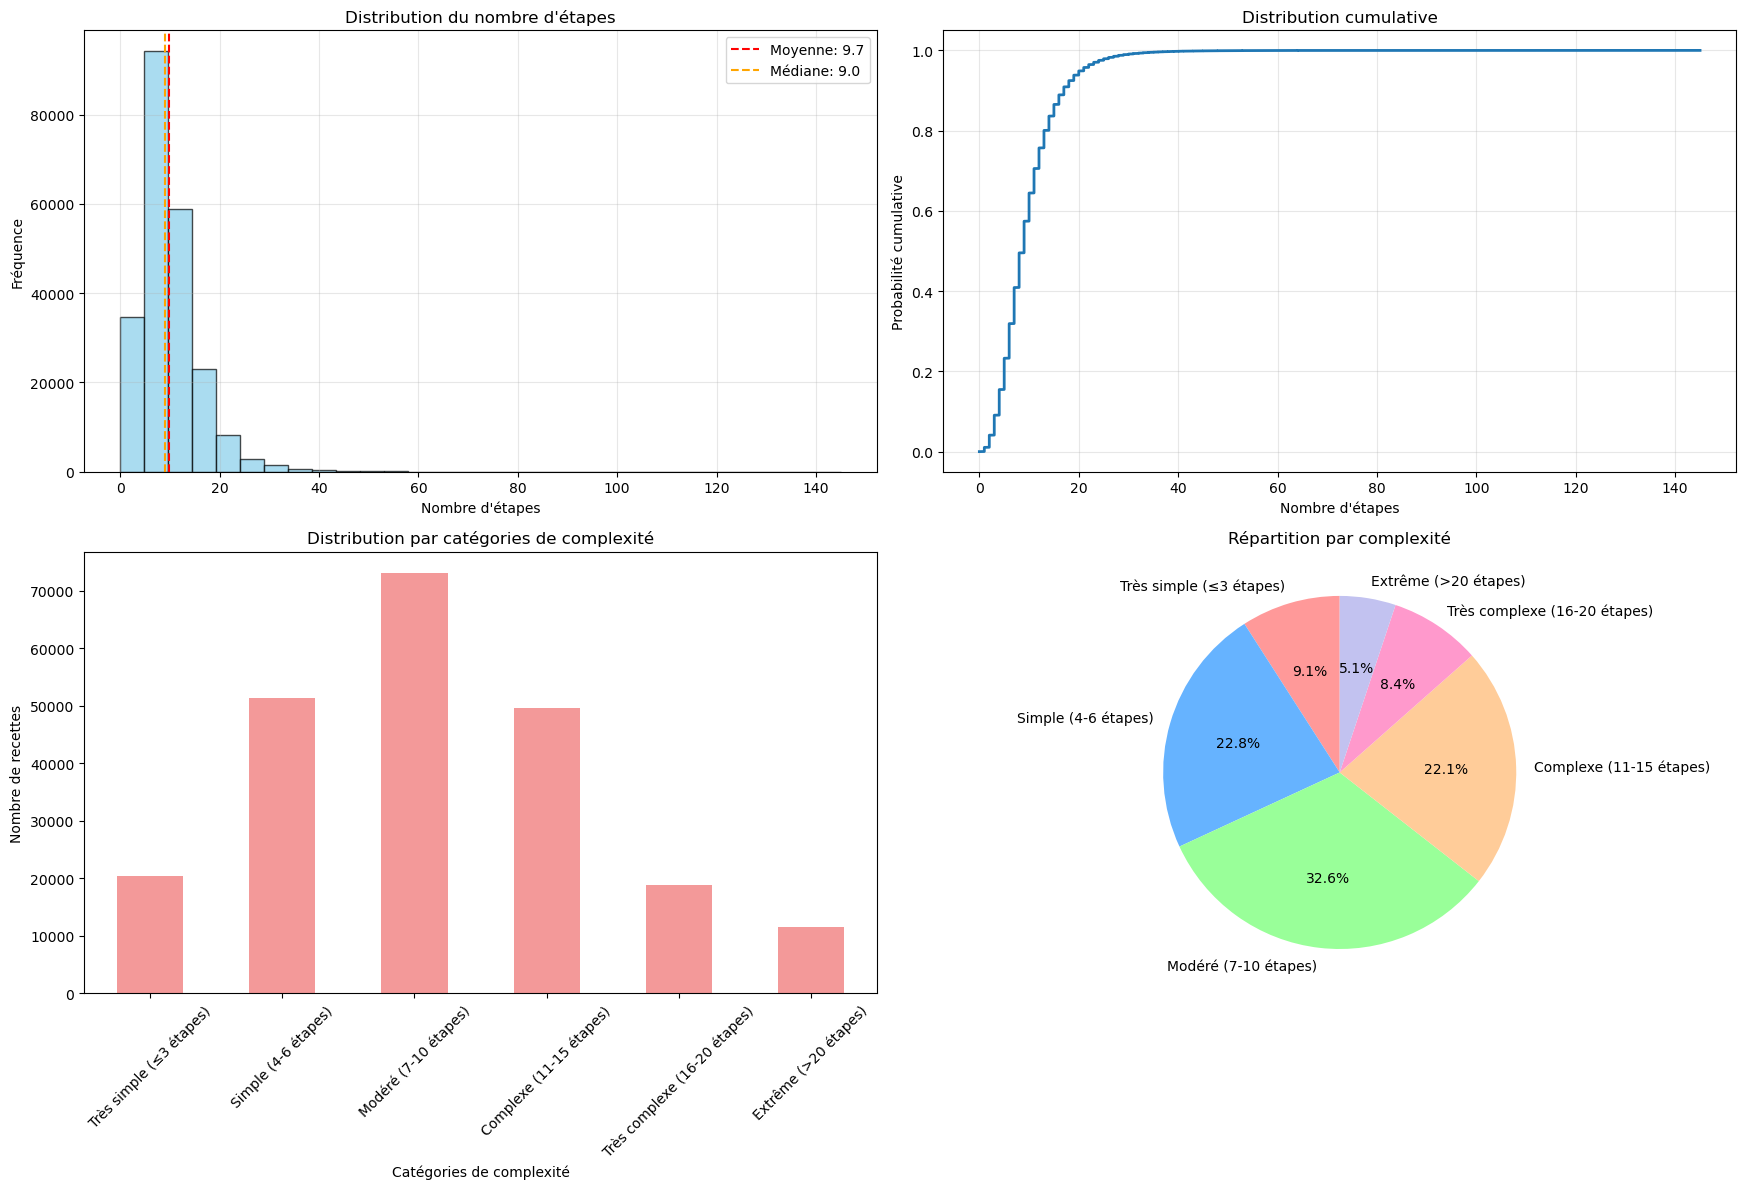

In [18]:
#visualisation graphique 

plot_n_steps_distribution(recipes_df, show=True)

**Analyse sur la variable tags**

In [2]:
analyse_tags(recipes_df)

,Valeur
Nb_uniques_tags,552
Nb_tags_les_plus_utilises,"[(preparation, 223470), (time-to-make, 218321)..."
Taux_tags_Uniques (1),8.152174
Taux_tags_Tres_rares (2-5),1.992754
Taux_tags_Rares (6-20),4.347826
Taux_tags_Peu_communs (21-100),11.050725
Taux_tags_Communs (101-1000),28.623188
Taux_tags_Tres_communs (>1000),45.833333


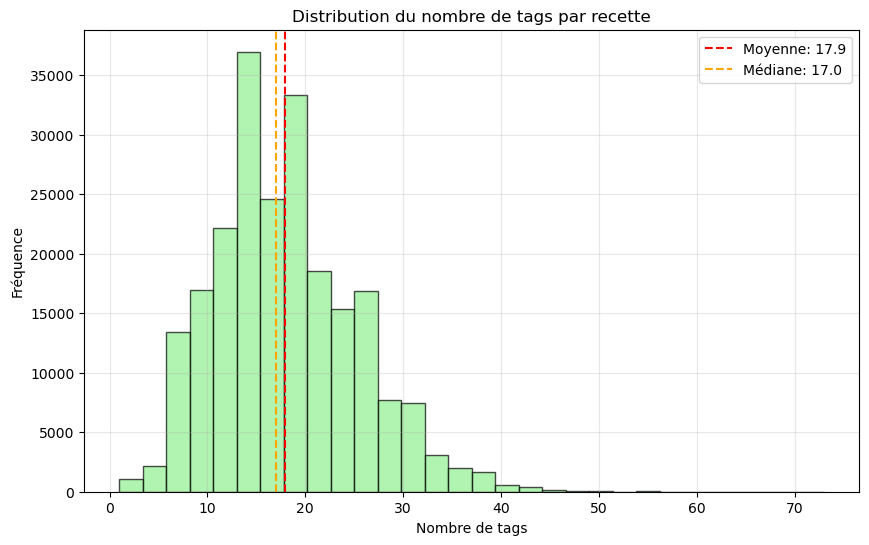

In [20]:
plot_tags_distribution(recipes_df, show=True)

**Analyse des caractéristiques nutritionnelles des recettes**

In [21]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


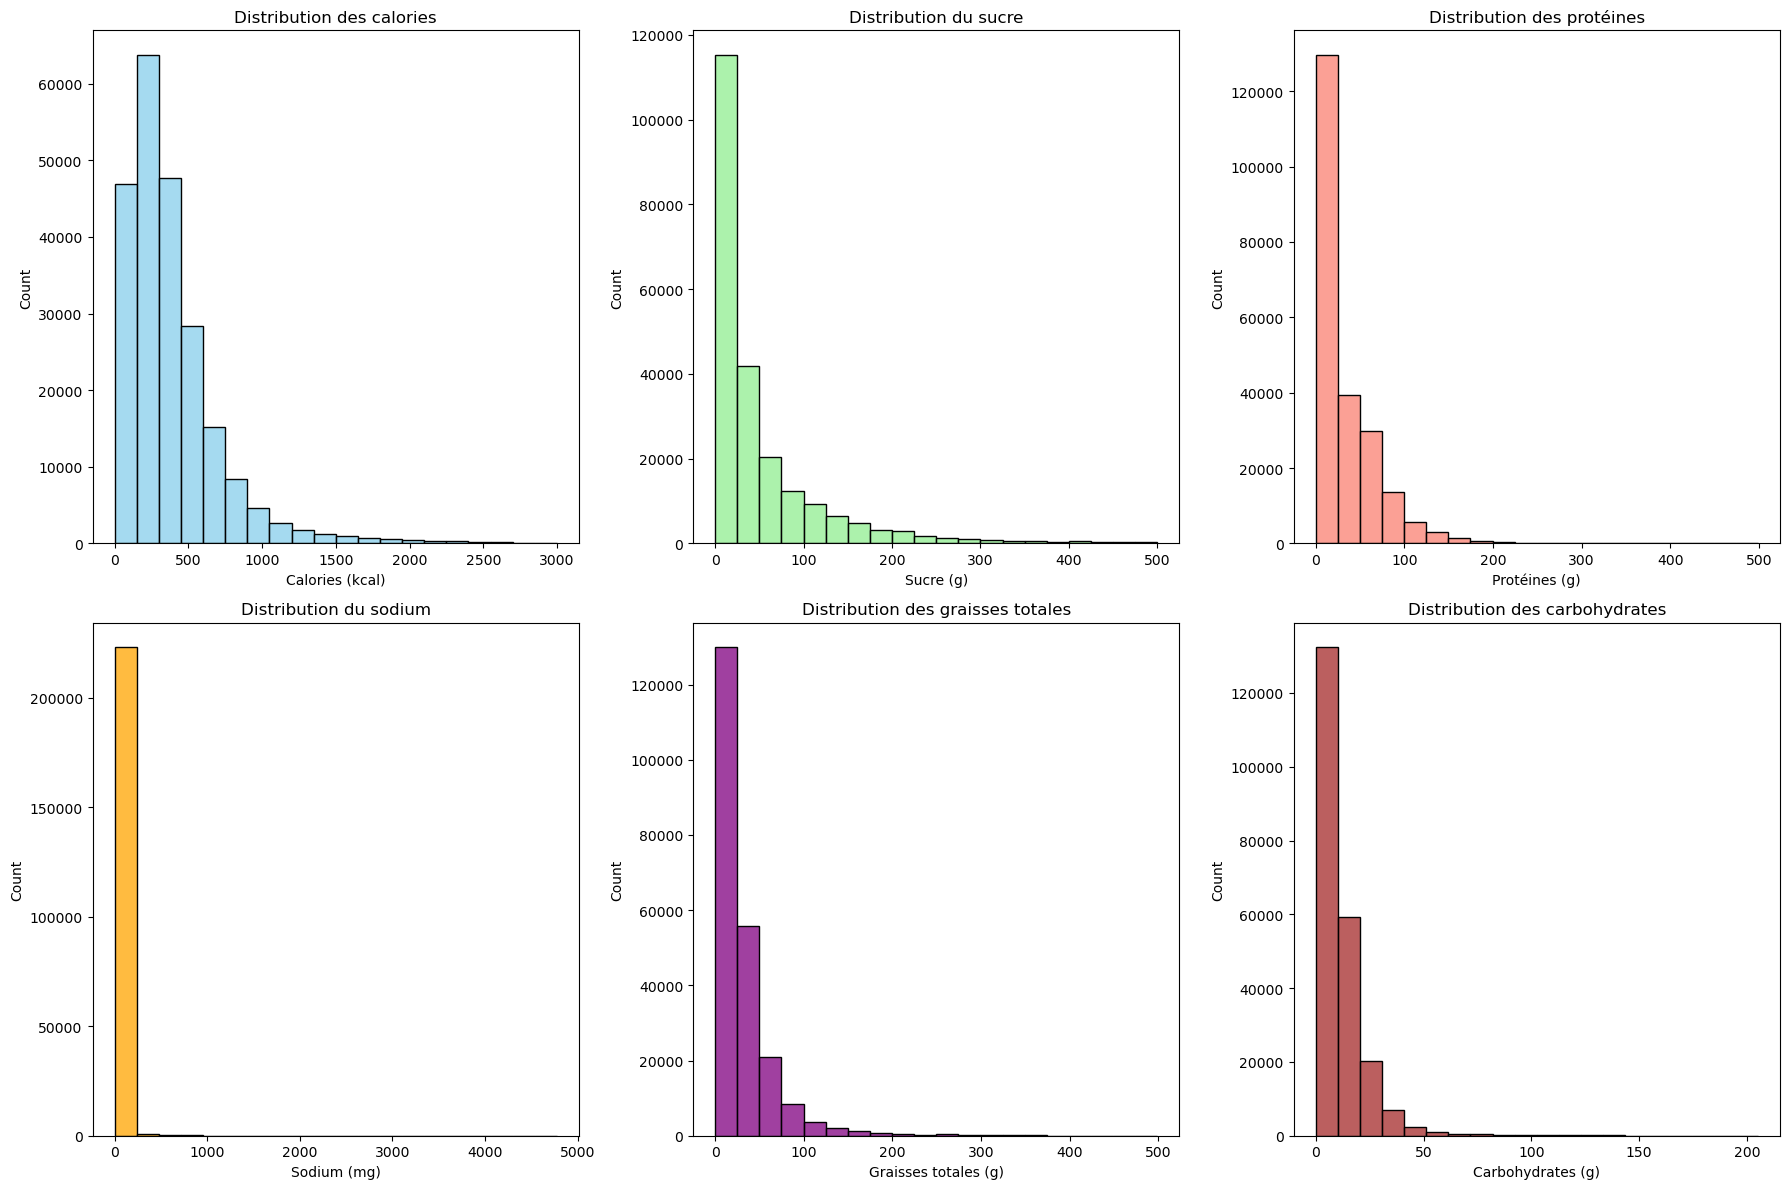

In [2]:
plot_nutrition_distribution(recipes_df, show=True)

In [3]:
#statistiques descriptives 
statistique_descriptive(recipes_df, column='calories')



,Valeur
Moyenne,386.603240
Médiane,303.900000
Écart-type,335.835942
Variance,112785.779999
Minimum,0.000000
Maximum,2998.400000
quantile_025,170.500000
quantile_075,493.100000
skewness,2.586252
kurtosis,10.385223


In [4]:
statistique_descriptive(recipes_df, column='protein')

,Valeur
Moyenne,32.237632
Médiane,18.000000
Écart-type,37.365450
Variance,1396.176835
Minimum,0.000000
Maximum,499.000000
quantile_025,6.000000
quantile_075,49.000000
skewness,2.498518
kurtosis,11.545162


In [5]:
statistique_descriptive(recipes_df, column='sodium')

,Valeur
Moyenne,26.682930
Médiane,14.000000
Écart-type,80.378674
Variance,6460.731219
Minimum,0.000000
Maximum,4777.000000
quantile_025,5.000000
quantile_075,31.000000
skewness,31.900789
kurtosis,1485.471717


In [6]:
statistique_descriptive(recipes_df, column='sugar')

,Valeur
Moyenne,50.318753
Médiane,23.000000
Écart-type,70.055048
Variance,4907.709808
Minimum,0.000000
Maximum,500.000000
quantile_025,9.000000
quantile_075,61.000000
skewness,2.729275
kurtosis,9.154481


In [2]:
###Chargeons le data merged pour des analyses supplémentaires
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224528 entries, 0 to 224527
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   recipe_id         224528 non-null  int64  
 1   total_reviews     224528 non-null  int64  
 2   negative_reviews  224528 non-null  int64  
 3   minutes           224528 non-null  float64
 4   submitted         224528 non-null  object 
 5   tags              224528 non-null  object 
 6   nutrition         224528 non-null  object 
 7   n_steps           224528 non-null  float64
 8   steps             224528 non-null  object 
 9   ingredients       224528 non-null  object 
 10  n_ingredients     224528 non-null  float64
 11  calories          224528 non-null  float64
 12  total_fat         224528 non-null  float64
 13  sugar             224528 non-null  float64
 14  sodium            224528 non-null  float64
 15  protein           224528 non-null  float64
 16  saturated_fat     22

In [3]:
merged_df[merged_df['minutes'] < 1]

,recipe_id,total_reviews,negative_reviews,minutes,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
181,387,2,0,0.0,1999-08-30,"['15-minutes-or-less', 'time-to-make', 'course...","[91.0, 1.0, 72.0, 6.0, 2.0, 3.0, 6.0]",5.0,"['place coffee concentrate in tall glass', 'ad...","['chocolate flavored coffee', 'milk', 'coffee ...",5.0,91.0,1.0,72.0,6.0,2.0,3.0,6.0
346,707,1,0,0.0,1999-08-08,"['15-minutes-or-less', 'time-to-make', 'course...","[508.2, 41.0, 17.0, 15.0, 42.0, 80.0, 15.0]",15.0,"['preheat oven to 375 degrees f', 'for frozen ...","['spinach', 'carrots', 'potatoes', 'low-fat cr...",12.0,508.2,41.0,17.0,15.0,42.0,80.0,15.0
350,736,9,1,0.0,1999-09-07,"['15-minutes-or-less', 'time-to-make', 'course...","[61.5, 3.0, 8.0, 6.0, 6.0, 2.0, 2.0]",9.0,"['in a medium size bowl , combine the whole wh...","['whole wheat flour', 'oat bran', 'cornmeal', ...",11.0,61.5,3.0,8.0,6.0,6.0,2.0,2.0
351,742,3,0,0.0,1999-08-18,"['15-minutes-or-less', 'time-to-make', 'course...","[138.2, 2.0, 0.0, 6.0, 8.0, 1.0, 8.0]",25.0,['in a large mixing bowl stir together the 2 c...,"['all-purpose flour', 'salt', 'egg whites', 'w...",5.0,138.2,2.0,0.0,6.0,8.0,1.0,8.0
356,760,3,0,0.0,1999-08-15,"['15-minutes-or-less', 'time-to-make', 'course...","[1933.3, 163.0, 86.0, 141.0, 391.0, 207.0, 13.0]",5.0,['spread minced garlic on round steak and spri...,"['garlic', 'round steaks', 'salt', 'pepper', '...",10.0,1933.3,163.0,86.0,141.0,391.0,207.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41761,76699,1,0,0.0,2003-11-16,"['15-minutes-or-less', 'time-to-make', 'course...","[343.7, 18.0, 100.0, 24.0, 7.0, 33.0, 19.0]",9.0,['arrange one third of sliced cake in the bott...,"['poundcake', 'vanilla flavor instant pudding ...",6.0,343.7,18.0,100.0,24.0,7.0,33.0,19.0
42649,78355,1,1,0.0,2003-12-09,"['15-minutes-or-less', 'time-to-make', 'course...","[1188.6, 27.0, 70.0, 100.0, 69.0, 26.0, 73.0]",1.0,['dump in bread machine in order of manufactur...,"['yeast', 'basil', 'salt', 'sugar', 'flour', '...",8.0,1188.6,27.0,70.0,100.0,69.0,26.0,73.0
43571,80121,7,1,0.0,2004-01-05,"['15-minutes-or-less', 'time-to-make', 'course...","[752.9, 50.0, 399.0, 15.0, 20.0, 86.0, 37.0]",13.0,"['pick over cranberries', 'chop cranberries in...","['fresh cranberries', 'crushed pineapple', 'wa...",8.0,752.9,50.0,399.0,15.0,20.0,86.0,37.0
45250,83257,16,0,0.0,2004-02-06,"['15-minutes-or-less', 'time-to-make', 'course...","[187.2, 8.0, 14.0, 28.0, 16.0, 4.0, 9.0]",2.0,"['mix all ingredients in large bowl', 'let res...","['black beans', 'corn', 'cilantro', 'red bell ...",11.0,187.2,8.0,14.0,28.0,16.0,4.0,9.0


In [4]:
one_month = 60 * 24 * 30  # 43 200 minutes = 30 jours

extreme_recipes = merged_df[merged_df['minutes'] > one_month]
print("Nombre de recettes extrêmes :", len(extreme_recipes))

Nombre de recettes extrêmes : 0


Le temps de préparation influence-t-il le niveau de satisfaction des utilisateurs ?

C:\Users\ABDILLAHIOMARDJAMA\Documents\MangeTaMain\src\data_visualization.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\ABDILLAHIOMARDJAMA\Documents\MangeTaMain\src\data_visualization.py:848: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


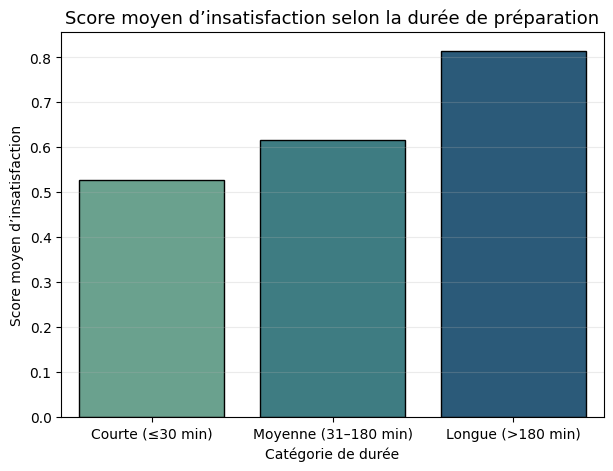

In [2]:
minutes_group_negative_reviews_bar(merged_df, show=True)